In [2]:
#plot

import pickle
import matplotlib.pyplot as plt

# with open('result_BRIDGE_faultless.pickle', 'rb') as handle:
#     bridge_faultless = pickle.load(handle)

# with open('result_BRIDGE_b4.pickle', 'rb') as handle:
#     bridge_b4 = pickle.load(handle)
    
with open('result_DGD_faultless.pickle', 'rb') as handle:
    DGD_faultless = pickle.load(handle)  
    
with open('result_median_faultless.pickle', 'rb') as handle:
    median_faultless = pickle.load(handle) 
    
with open('result_median_b4.pickle', 'rb') as handle:
    median_b4 = pickle.load(handle)  
    
with open('result_ByRDiE_b4.pickle', 'rb') as handle:
    ByRDiE_b4 = pickle.load(handle) 

ByRDiE_b4 = np.mean(ByRDiE_b4, axis = 1)

with open('result_ByRDiE_faultless.pickle', 'rb') as handle:
    ByRDiE_faultless = pickle.load(handle) 

ByRDiE_faultless = np.mean(ByRDiE_faultless, axis = 1)


# with open('result_DGD_b4.pickle', 'rb') as handle:
#     DGD_b4 = pickle.load(handle)  

# with open('result_krum_b2.pickle', 'rb') as handle:
#     krum_b2 = pickle.load(handle) 
    
# with open('result_krum_faultless.pickle', 'rb') as handle:
#     krum_faultless = pickle.load(handle) 
    
# with open('result_bulyan_b2.pickle', 'rb') as handle:
#     bulyan_b2 = pickle.load(handle) 
    
# with open('result_bulyan_faultless.pickle', 'rb') as handle:
#     bulyan_faultless = pickle.load(handle) 
    
byrdie_axis_200 = []
for t in range(100):
    for p in range(39):
        byrdie_axis_200.append(t * 7840 + (p+1) * 200)
    for p in range(10):
        byrdie_axis_200.append((t+1) * 7840 + p)
DGD_axis = [7840 * t  for t in range(100)]
        
f = plt.figure(1)
f.set_figheight(6)
f.set_figwidth(15)

plot_b0 = plt.subplot(1,2,1)
plt.plot(DGD_axis[:100], DGD_faultless[:100], marker = 'v', markevery = 5)
plt.plot(byrdie_axis_200, ByRDiE_faultless, marker = '.', markevery = 200)
plt.plot(DGD_axis[:100], bridge_faultless[:100], marker = 'p', markevery = 5)
plt.plot(DGD_axis[:100], median_faultless[:100], marker = 's', markevery = 5)
plt.plot(DGD_axis[:100], krum_faultless[:100], marker = '*', markevery = 5)
plt.plot(DGD_axis[:100], bulyan_faultless[:100], marker = 'x', markevery = 5)
plt.xlabel('Scalar messages broadcasted')
plt.ylabel('Accuracy')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE', 'Median', 'Krum', 'Bulyan'], loc = 'right')
plot_b0.set_title('(a) No Byzantine nodes with parameter b=2', y=-0.15)


plot_b2 = plt.subplot(1,2,2)
plt.plot(DGD_axis[:100], dgd_b2[:100], marker = 'v', markevery = 5)
plt.plot(byrdie_axis_200, ByRDiE_b4, marker = '.', markevery = 200)
plt.plot(DGD_axis[:100], bridge_b2[:100], marker = 'p', markevery = 5)
plt.plot(DGD_axis[:100], median_b4[:100], marker = 's', markevery = 5)
plt.plot(DGD_axis[:100], krum_b2[:100], marker = '*', markevery = 5)
plt.plot(DGD_axis[:100], bulyan_b2[:100], marker = 'x', markevery = 5)
plt.xlabel('Scalar messages broadcasted')
plt.ylabel('Accuracy')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE', 'Median', 'Krum', 'Bulyan'], loc = 'right')
plot_b2.set_title('(b) 2 Byzantine nodes with parameter b=2', y=-0.15)

f.savefig('decentralized_plot.pdf')
plt.show()

NameError: name 'bridge_faultless' is not defined

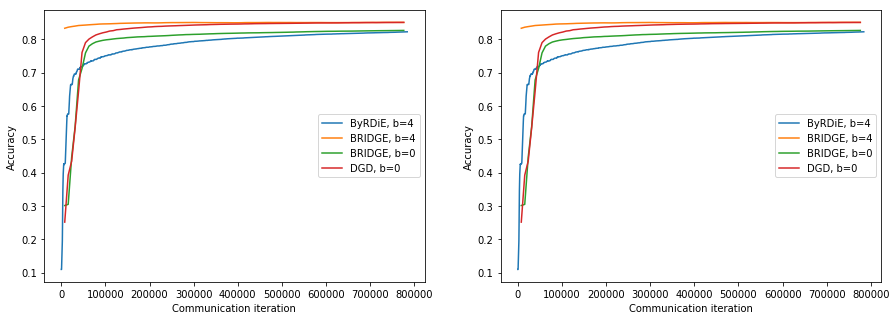

In [29]:
f = plt.figure(1)
f.set_figheight(5)
f.set_figwidth(15)

plt.subplot(1,2,1)
plt.plot(byrdie_axis_200, m)
plt.plot(DGD_axis[1:100], bridge_b4[1:100])
plt.plot(DGD_axis[1:100], bridge_faultless[1:100])
plt.plot(DGD_axis[1:100], DGD_faultless[1:100])
plt.xlabel('Communication iteration')
plt.ylabel('Accuracy')
plt.legend(['ByRDiE, b=4', 'BRIDGE, b=4', 'BRIDGE, b=0', 'DGD, b=0'], loc = 'right')


plt.subplot(1,2,2)
plt.plot(byrdie_axis_200, m)
plt.plot(DGD_axis[1:100], bridge_b4[1:100])
plt.plot(DGD_axis[1:100], bridge_faultless[1:100])
plt.plot(DGD_axis[1:100], DGD_faultless[1:100])
plt.xlabel('Communication iteration')
plt.ylabel('Accuracy')
plt.legend(['ByRDiE, b=4', 'BRIDGE, b=4', 'BRIDGE, b=0', 'DGD, b=0'], loc = 'right')

f.savefig('decentralized_plot.pdf')
plt.show()

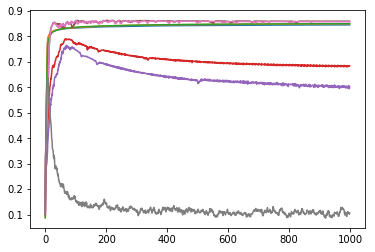

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
smooth_bridge_faultless = []
smooth_bridge_b2 = []
smooth_dgd_faultless = []
smooth_krum_faultless = []
smooth_bulyan_faultless = []
smooth_dgd_b2 = []
smooth_krum_b2 = []
smooth_bulyan_b2 = []
smooth_byrdie_faultless = []

for test_round in range(10):
    with open('./ByRDiE/ByRDiE_faultless_9%d.pickle'%test_round, 'rb') as handle:       
        smooth_byrdie_faultless.append(pickle.load(handle, encoding='latin1'))

for test_round in range(10):
    with open('./BRIDGE/result_BRIDGE_faultless%d.pickle'%test_round, 'rb') as handle:       
        smooth_bridge_faultless.append(pickle.load(handle))
for test_round in range(10):
    with open('./BRIDGE/result_BRIDGE_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bridge_b2.append(pickle.load(handle))
for test_round in range(10):
    with open('./DGD/result_DGD_faultless%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_faultless.append(pickle.load(handle))
for test_round in range(10):
    with open('./DGD/result_DGD_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_b2.append(pickle.load(handle))
for test_round in range(50):
    with open('./Krum/result_krum_faultless_%d.pickle'%test_round, 'rb') as handle:       
        smooth_krum_faultless.append(pickle.load(handle))
for test_round in range(40):
    with open('./Krum/result_krum_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_krum_b2.append(pickle.load(handle))
for test_round in range(40):
    with open('./Bulyan/result_bulyan_faultless_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bulyan_faultless.append(pickle.load(handle))
for test_round in range(30):
    with open('./Bulyan/result_bulyan_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_bulyan_b2.append(pickle.load(handle))
        
        
byrdie_faultless = np.mean(smooth_byrdie_faultless, axis=0)
byrdie_faultless = np.mean(byrdie_faultless, axis=1)
bridge_faultless = np.mean(smooth_bridge_faultless, axis=0)
bridge_b2 = np.mean(smooth_bridge_b2, axis=0)
dgd_faultless = np.mean(smooth_dgd_faultless, axis=0)
dgd_b2 = np.mean(smooth_dgd_b2, axis=0)
krum_faultless = np.mean(smooth_krum_faultless, axis=0)
krum_b2 = np.mean(smooth_krum_b2, axis=0)
bulyan_faultless = np.mean(smooth_bulyan_faultless, axis=0)
bulyan_b2 = np.mean(smooth_bulyan_b2, axis=0)
plt.plot(bridge_faultless)
plt.plot(bridge_b2)
plt.plot(dgd_faultless)
plt.plot(krum_faultless)
plt.plot(krum_b2)
plt.plot(bulyan_faultless)
plt.plot(bulyan_b2)
plt.plot(dgd_b2)
plt.show()

In [26]:
#plot

import pickle
import matplotlib.pyplot as plt
import numpy as np

for test_round in range(10):
    with open('./DGD/result_DGD_b2_%d.pickle'%test_round, 'rb') as handle:       
        smooth_dgd_b2.append(pickle.load(handle))

dgd_b2 = np.mean(smooth_dgd_b2, axis=0)

with open('result_BRIDGE_faultless.pickle', 'rb') as handle:
    bridge_faultless = pickle.load(handle)

# with open('result_BRIDGE_b4.pickle', 'rb') as handle:
#     bridge_b4 = pickle.load(handle)
    
with open('result_DGD_faultless.pickle', 'rb') as handle:
    DGD_faultless = pickle.load(handle)  
    
with open('result_median_faultless.pickle', 'rb') as handle:
    median_faultless = pickle.load(handle) 
    
with open('result_median_b4.pickle', 'rb') as handle:
    median_b4 = pickle.load(handle)  
    
with open('./ByRDiE/ByRDiE_faultless_93.pickle', 'rb') as handle:
    ByRDiE_b4 = pickle.load(handle, encoding='latin1') 

ByRDiE_b4 = np.mean(ByRDiE_b4, axis = 1)

# with open('result_ByRDiE_faultless.pickle', 'rb') as handle:
#     ByRDiE_faultless = pickle.load(handle)

with open('./ByRDiE/ByRDiE_faultless_0.pickle', 'rb') as handle:
    #(4000,20) list
    ByRDiE_faultless = pickle.load(handle)
#(4000,) list
byrdie_faultless = np.mean(ByRDiE_faultless, axis = 1)


# with open('result_DGD_b4.pickle', 'rb') as handle:
#     DGD_b4 = pickle.load(handle)  

# with open('result_krum_b2.pickle', 'rb') as handle:
#     krum_b2 = pickle.load(handle) 
    
with open('result_krum_faultless.pickle', 'rb') as handle:
    krum_faultless = pickle.load(handle) 
    
# with open('result_bulyan_b2.pickle', 'rb') as handle:
#     bulyan_b2 = pickle.load(handle) 
    
with open('result_bulyan_faultless.pickle', 'rb') as handle:
    bulyan_faultless = pickle.load(handle) 
    
byrdie_axis_200 = []
for t in range(100):
    for p in range(39):
        byrdie_axis_200.append(t * 7840 + (p+1) * 200)
    for p in range(10):
        byrdie_axis_200.append((t+1) * 7840 + p)
        
DGD_axis = [7840 * t  for t in range(100)]

    
byrdie_axis_b1 = []
for t in range(100):
    for p in range(39):
        byrdie_axis_b1.append(t * 7840 + (p+1) * 200)
    for p in range(10, 11):
        byrdie_axis_b1.append((t+1) * 7840 + p)

        
f = plt.figure(1)
f.set_figheight(6)
f.set_figwidth(15)

plot_b0 = plt.subplot(1,2,1)
plt.plot(DGD_axis[:100], np.array(DGD_faultless[:100]) * 100, marker = 'v', markevery = 5)
# plt.plot(byrdie_axis_200, np.array(ByRDiE_faultless) * 100, marker = '.', markevery = 200)
plt.plot(byrdie_axis_b1[:3960], np.array(byrdie_faultless[:3960]) * 100, marker = '.', markevery = 200)
plt.plot(DGD_axis[:100], np.array(bridge_faultless[:100]) * 100, marker = 'p', markevery = 5)
plt.plot(DGD_axis[:100], np.array(median_faultless[:100]) * 100, marker = 's', markevery = 5)
plt.plot(DGD_axis[:100], np.array(krum_faultless[:100]) * 100, marker = '*', markevery = 5)
plt.plot(DGD_axis[:100], np.array(bulyan_faultless[:100]) * 100, marker = 'x', markevery = 5)
plt.xlabel('Number of Scalars Broadcast per Node')
plt.ylim(5,90)
plt.ylabel('Average Classification Accuracy (%)')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE-T', 'BRIDGE-M', 'BRIDGE-K', 'BRIDGE-B'], loc = 'right')
# plot_b0.set_title('Network with no Byzantine node', y=-0.15)


plot_b2 = plt.subplot(1,2,2)
plt.plot(DGD_axis[:100], np.array(dgd_b2[:100]) * 100, marker = 'v', markevery = 5)
plt.plot(byrdie_axis_b1[:3960], np.array(ByRDiE_b4) * 100, marker = '.', markevery = 200)
plt.plot(DGD_axis[:100], np.array(bridge_b2[:100]) * 100, marker = 'p', markevery = 5)
plt.plot(DGD_axis[:100], np.array(median_b4[:100]) * 100, marker = 's', markevery = 5)
plt.plot(DGD_axis[:100], np.array(krum_b2[:100]) * 100, marker = '*', markevery = 5)
plt.plot(DGD_axis[:100], np.array(bulyan_b2[:100]) * 100, marker = 'x', markevery = 5)
plt.xlabel('Number of Scalars Broadcast per Node')
plt.ylim(5,90)
plt.ylabel('Average Classification Accuracy (%)')
plt.legend(['DGD', 'ByRDiE', 'BRIDGE-T', 'BRIDGE-M', 'BRIDGE-K', 'BRIDGE-B'], loc = 'right')
# plot_b2.set_title('Network with 2 Byzantine nodes', y=-0.15)

f.savefig('decentralized_plot.pdf', bbox_inches = 'tight')
f.savefig('test_png.png', dpi=300)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: './DGD/result_DGD_b2_0.pickle'

In [29]:
with open('./ByRDiE/ByRDiE_faultless_94.pickle', 'rb') as handle:       
    acc_1 = pickle.load(handle, encoding='latin1')
    
with open('./ByRDiE/ByRDiE_b4_84.pickle', 'rb') as handle:       
    acc_2 = pickle.load(handle, encoding='latin1')
    
with open('./ByRDiE/ByRDiE_b4_82.pickle', 'rb') as handle:       
    acc_3 = pickle.load(handle, encoding='latin1')

print(len(acc_1[-1]))
print(len(acc_2[-1]))

print(acc_1[3600])
print(acc_2[-1])
print(acc_3[-1])


20
20
[0.7975, 0.8015, 0.7886, 0.7916, 0.7842, 0.7963, 0.7914, 0.7921, 0.7992, 0.7938, 0.7884, 0.7873, 0.789, 0.7893, 0.7908, 0.7904, 0.7895, 0.7923, 0.7812, 0.7921]
[0.7254, 0.726, 0.7233, 0.7208, 0.718, 0.728, 0.7221, 0.7217, 0.7156, 0.7011, 0.7224, 0.7165, 0.7238, 0.7298, 0.7231, 0.7098, 0.7218, 0.7149, 0.726, 0.7269]
[0.7882, 0.7741, 0.7864, 0.7931, 0.783, 0.783, 0.7831, 0.7843, 0.7852, 0.7759, 0.7814, 0.7741, 0.7841, 0.7691, 0.788, 0.7912, 0.7744, 0.7797, 0.7801, 0.7765]


In [5]:
with open('result_ByRDiE_faultless.pickle', 'rb') as handle:
    ByRDiE_faultless = pickle.load(handle)

In [6]:
len(ByRDiE_faultless)

4900

In [7]:
len(ByRDiE_faultless[0])

20

In [8]:
len(ByRDiE_faultless[1])

20

In [12]:
all([len(faultlessByRDiE) == 20 for faultlessByRDiE in ByRDiE_faultless])

True

In [13]:
numpyByRDiE = np.array(ByRDiE_faultless)

In [14]:
numpyByRDiE.shape

(4900, 20)

In [15]:
with open('./ByRDiE/ByRDiE_faultless_0.pickle','rb') as handle:
    ByRDiE_faultless = pickle.load(handle)

In [16]:
ByRDiE_faultless = np.array(ByRDiE_faultless)

In [17]:
ByRDiE_faultless.shape

(4000, 20)

In [18]:
np.mean(ByRDiE_faultless,axis=1).shape

(4000,)

In [19]:
np.array(median_b4).shape

(100,)

In [21]:
len(byrdie_axis_b1)

4000

In [24]:
(np.mean(ByRDiE_faultless*100,axis=1)).shape

(4000,)